<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA
<img width = 600 src = https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png />

## Introduction
Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

**Note**: Features, Dimensions, and Variables are all referring to the same thing. You will find them being used interchangeably.

<img width = 600 src = https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1635528035/pca1_cjlqjy.png />

Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples you achieve a set of u uncorrelated principal components over the same y samples.

Dataset - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape

(918, 12)

Plotting distribution and box plots for numeric columns 

In [ ]:
def out_plot(temp_df, col):

  fig, axes = plt.subplots(1, 2, figsize=(15, 5))
  fig.suptitle(f'Distribution plot and box plot for {col}')

  # Distribution plot
  sns.distplot(temp_df[col], ax=axes[0] )
  axes[0].set_title(f"{col} Distribution plot")

  # boxplot
  sns.boxplot(temp_df[col],ax=axes[1])
  axes[1].set_title(f"{col} Box plot")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
num_col = df.dtypes[df.dtypes != "object"].index
df[num_col]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [ ]:
num_df = df.select_dtypes(exclude = ["object"])
num_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [ ]:
num_col

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

<ipython-input-7-7b79f9042200>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_df[col], ax=axes[0] )
<ipython-input-7-7b79f9042200>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_df[col], ax=axes[0] )
<ipython-input-7-7b79f9042200>:7: UserWarning: 

`distplot` is a deprecated functi

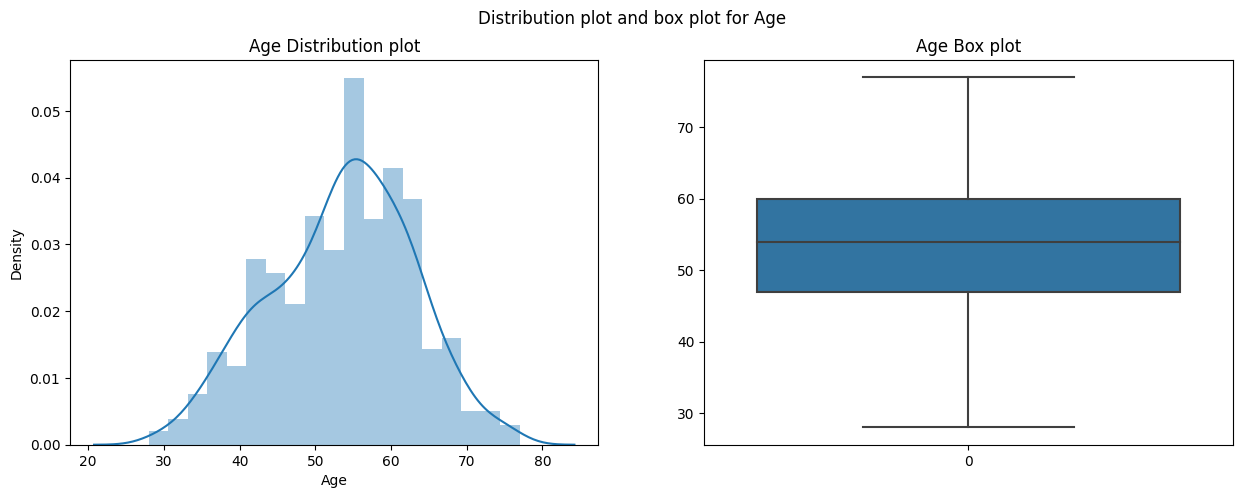

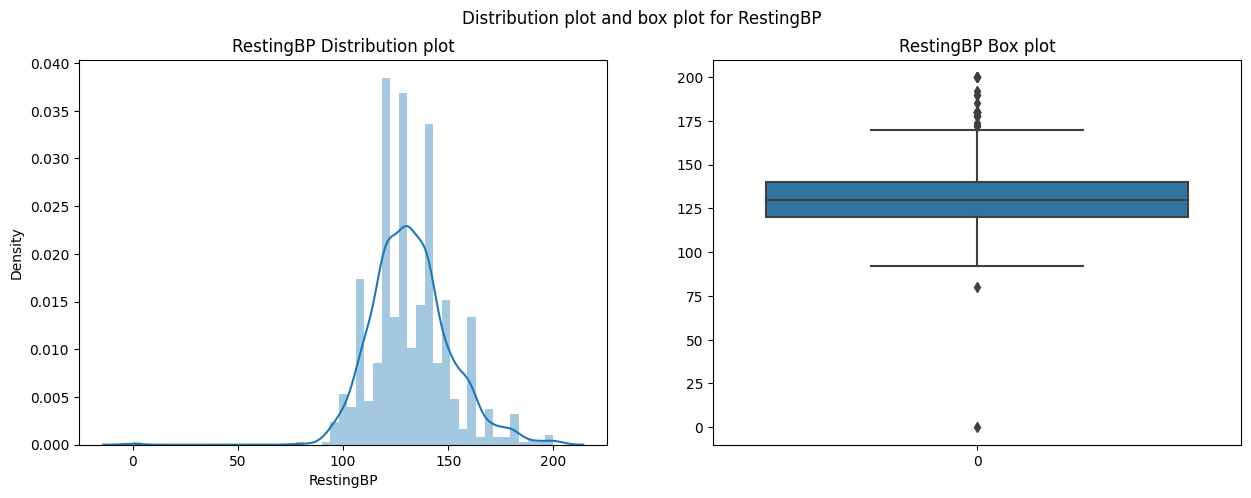

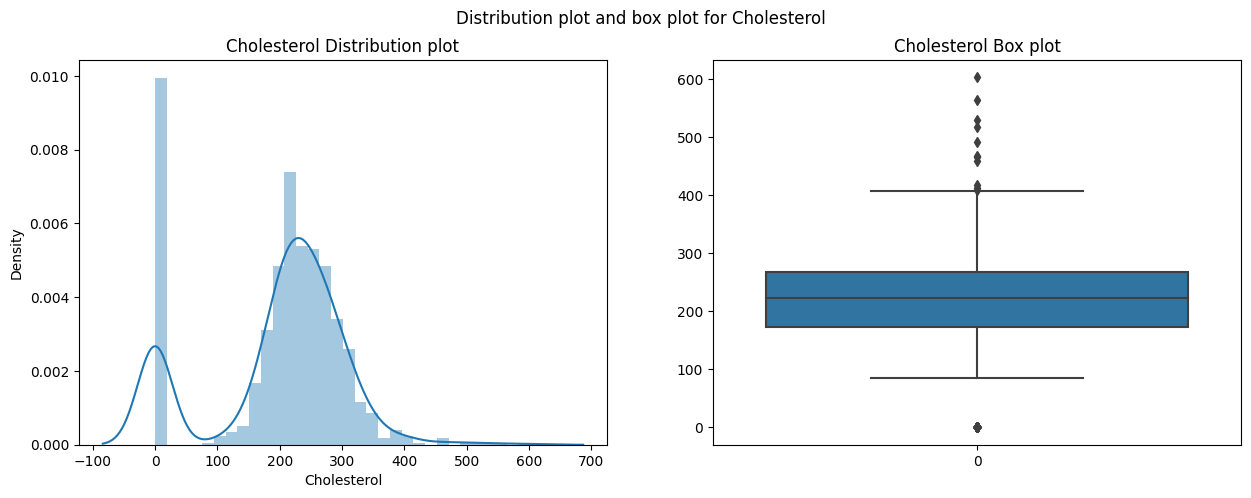

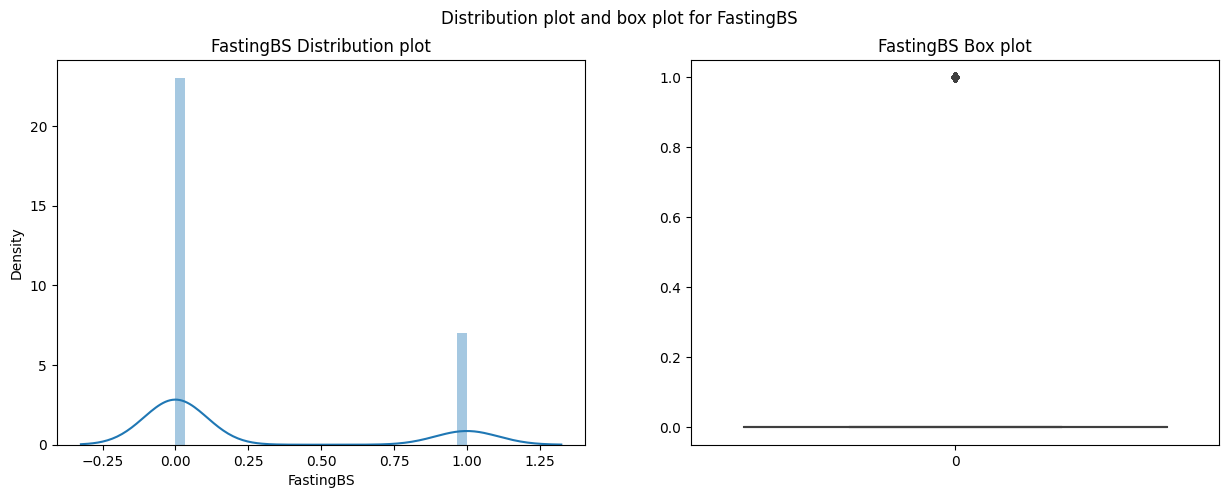

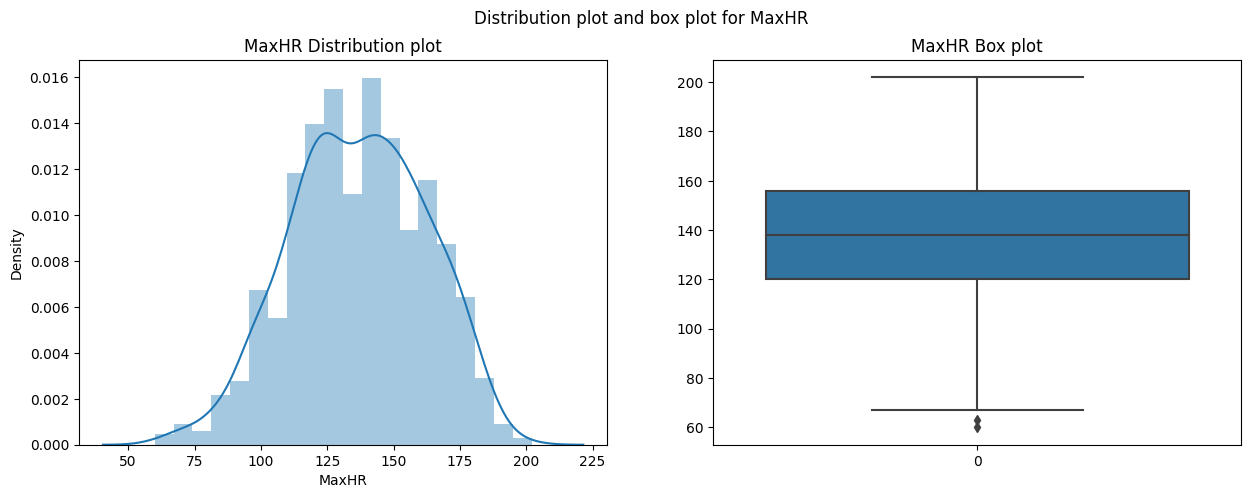

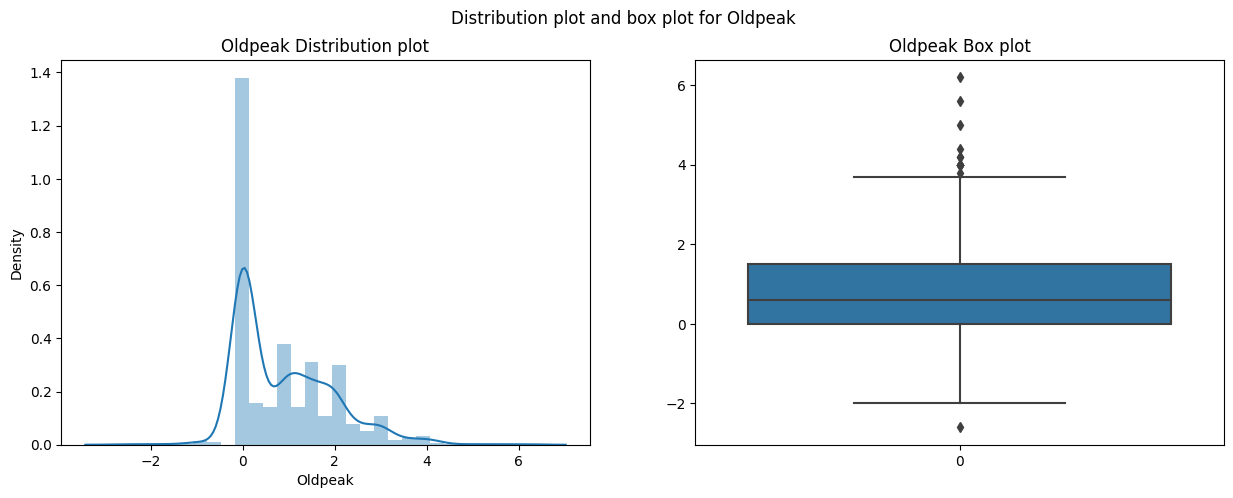

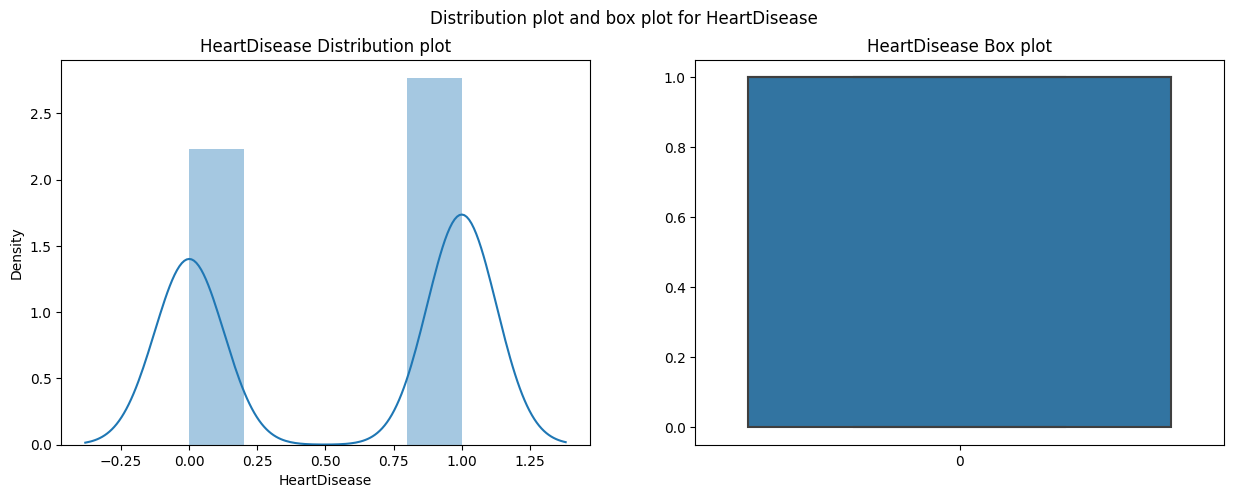

In [ ]:
for col in num_col:
  # print(col)
  out_plot(df,col)

In [ ]:
num_col

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

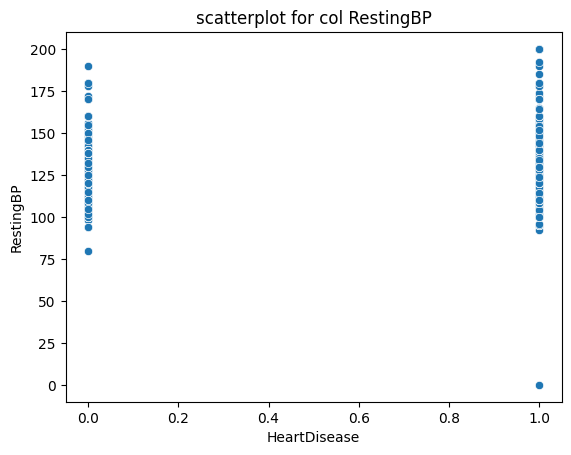

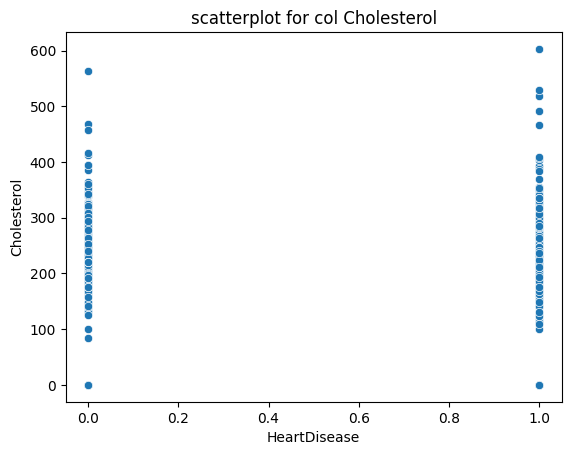

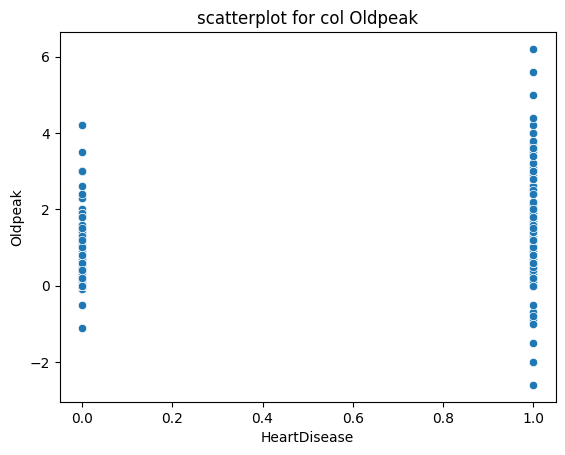

In [ ]:
cols = ["RestingBP", "Cholesterol", "Oldpeak"]

for col in cols:

  sns.scatterplot(data = df, x = "HeartDisease", y = col)
  plt.title(f"scatterplot for col {col}")
  plt.show()

In [ ]:
iqr_col = ["RestingBP","Oldpeak"]
Z_score_col = ["MaxHR"]

In [ ]:
def z_score_out(temp_df,col):
  # finding upper and lower limits

  upper_limit = temp_df[col].mean() + 3*temp_df[col].std()
  lower_limit = temp_df[col].mean() - 3*temp_df[col].std()
  # removing outliers
  # triming method
  return(temp_df[~((temp_df[col] > upper_limit) | (temp_df[col] < lower_limit))])

In [ ]:
def iqr_out(temp_df,col):
  q1 = temp_df[col].quantile(.25)
  q3 = temp_df[col].quantile(.75)
  iqr = q3 - q1
  #compute lower bound = (Q1–1.5IQR), upper bound = (Q3+1.5IQR)
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  return(temp_df[~(temp_df[col] < lower_bound) | (temp_df[col] > upper_bound)])

In [ ]:
df1 = df.copy()
df1.shape

(918, 12)

In [ ]:
iqr_col

['RestingBP', 'Oldpeak']

In [ ]:
for col in iqr_col:
  df1 = iqr_out(df1, col)
df1.shape

(915, 12)

In [ ]:
Z_score_col

['MaxHR']

In [ ]:
for col in Z_score_col:
  df1 = z_score_out(df1, col)
df1.shape

(914, 12)

In [ ]:
df1 = df1[~(df1["Cholesterol"] < 32)]
df1.shape

(746, 12)

In [ ]:
q1 = df["Cholesterol"].quantile(.25)
q3 = df["Cholesterol"].quantile(.75)
iqr = q3 - q1
#compute lower bound = (Q1–1.5IQR), upper bound = (Q3+1.5IQR)
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

print(lower_bound, upper_bound)

32.625 407.625


In [ ]:
df[~(df["Cholesterol"] < 32)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<ipython-input-7-7b79f9042200>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_df[col], ax=axes[0] )


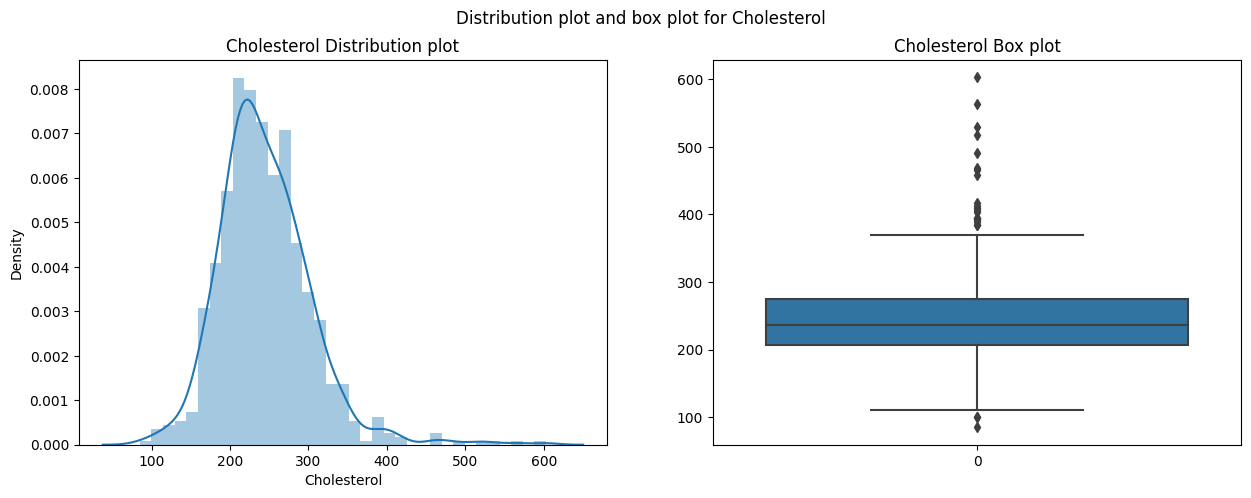

In [ ]:
out_plot(df1, "Cholesterol")

In [ ]:
for col in num_col.columns:
  out_plot(df1,col)

In [ ]:
for col in iqr_col:
  df1 = iqr_out(df1, col)
df1.shape

(900, 12)

In [ ]:
for col in Z_score_col:
  df1 = z_score_out(df1, col)
df1.shape

(899, 12)

In [ ]:
for col in num_col.columns:
  out_plot(df1,col)

In [ ]:
cat_col = [col for col in df1.columns if df1[col].dtypes == "object"]
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

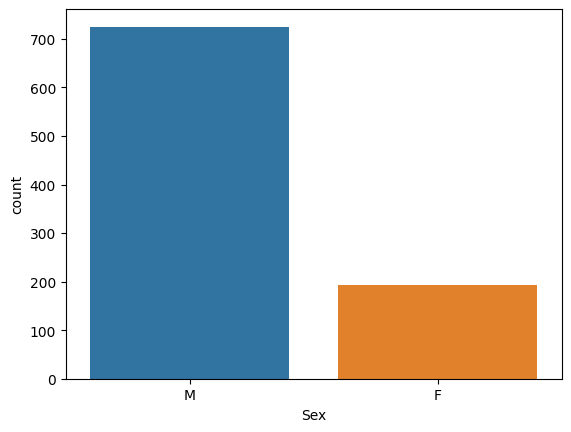

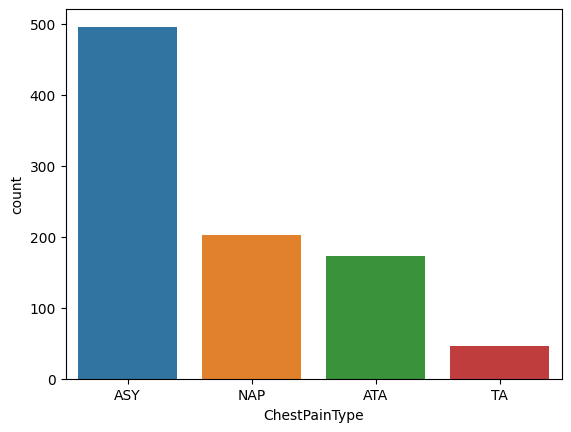

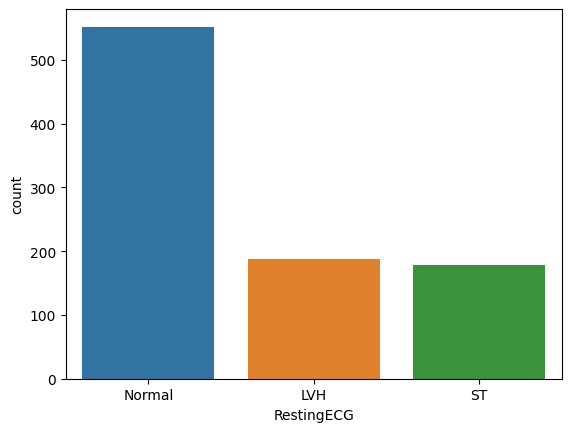

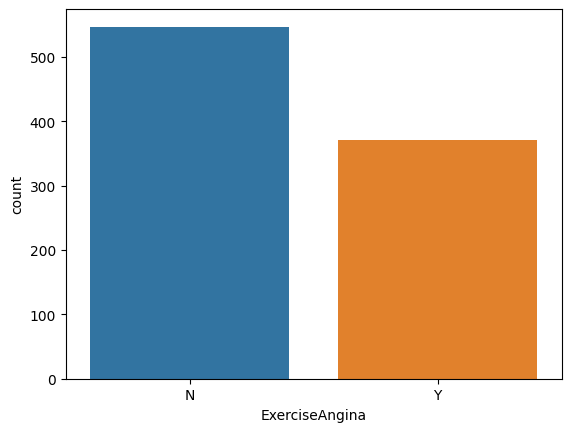

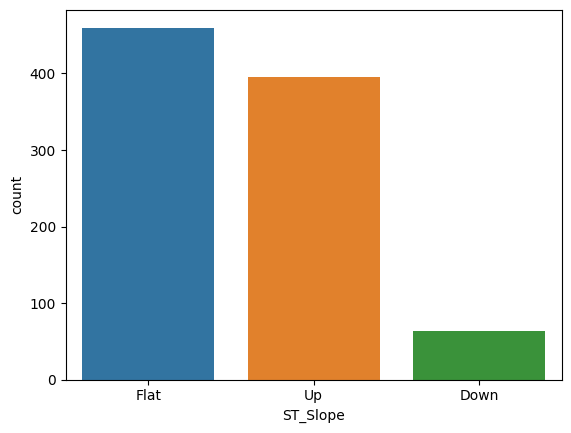

In [ ]:
for col in cat_col:
  sns.countplot(x = df[col], order = df[col].value_counts().index)
  plt.show()

In [ ]:
df1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
X = df1.drop(columns = ["HeartDisease"])
y = df1["HeartDisease"]

In [ ]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8,
                                                      random_state=0)
print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_valid -: {X_valid.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_valid -: {y_valid.shape}')

Shape of X_train -: (596, 11)
Shape of X_valid -: (150, 11)
Shape of y_train -: (596,)
Shape of y_valid -: (150,)


In [ ]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
object_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
set(X_train["ChestPainType"])

{'ASY', 'ATA', 'NAP', 'TA'}

In [ ]:
set(X_valid["ChestPainType"]) == set(X_train["ChestPainType"])

True

In [ ]:
a = ["a","b", "c", "d"]
b = ["a","b", "d"]

In [ ]:
set(b)- set(a)

set()

In [ ]:
set(a) - set(b)

{'c'}

In [ ]:
[col for col in object_cols if len(set(X_valid[col]) - set(X_train[col])) > 0]

[]

In [ ]:
[col for col in object_cols if set(X_train[col]) == set(X_valid[col])]

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import mean_absolute_error

In [ ]:
X_train.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [ ]:
X_train["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
ohe_col = ["ChestPainType","RestingECG"]
ord_col = ["ST_Slope"]
label_enc_col = ["ExerciseAngina","Sex"]

In [ ]:
# categorical encoding
ct_cat_enc = ColumnTransformer(transformers = [
    ('ohe_cat_columns',OneHotEncoder(sparse=False,handle_unknown='ignore'), ohe_col),
    ("ordinal_encoder_with_order", OrdinalEncoder(categories= [['Up', 'Flat', 'Down']]), ord_col),
    ("ordinal_encoder", OrdinalEncoder(), label_enc_col),
],remainder='passthrough')

In [ ]:
# define the model
model = LogisticRegression()

In [ ]:
# make pipeline
pipe = Pipeline(steps = [
    ('ct_cat_enc',ct_cat_enc),
    ('scale',StandardScaler()),
    ('model',model)
])

In [ ]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up
784,65,M,TA,138,282,1,LVH,174,N,1.4,Flat
720,48,M,ASY,124,274,0,LVH,166,N,0.5,Flat
683,44,F,NAP,118,242,0,Normal,149,N,0.3,Flat
493,51,M,NAP,137,339,0,Normal,127,Y,1.7,Flat
...,...,...,...,...,...,...,...,...,...,...,...
879,48,M,ATA,110,229,0,Normal,168,N,1.0,Down
192,48,M,ATA,130,245,0,Normal,160,N,0.0,Up
801,56,M,ASY,132,184,0,LVH,105,Y,2.1,Flat
731,46,M,ASY,120,249,0,LVH,144,N,0.8,Up


In [ ]:
# train
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct_cat_enc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_cat_columns',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['ChestPainType',
                                                   'RestingECG']),
                                                 ('ordinal_encoder_with_order',
                                                  OrdinalEncoder(categories=[['Up',
                                                                              'Flat',
                                                                              'Down']]),
                                                  ['ST_Slope']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['ExerciseAngina', 'Sex'])])),
                ('scale', StandardScaler()), ('model', LogisticRegression())])

In [ ]:
pipe.score(X_valid, y_valid)

0.8733333333333333

In [ ]:
# creating score_df for comparision of model accuracy
d = {'Process': [], 'Accuracy': []}
score_df = pd.DataFrame(data = d)
score_df

,Process,Accuracy


In [ ]:
d = {'Process': ["Without pca"],
     'Accuracy': [round(pipe.score(X_valid, y_valid),4)]}
temp_df = pd.DataFrame(data = d)
score_df = pd.concat([score_df,temp_df],ignore_index = True)
score_df

,Process,Accuracy
0,Without pca,0.8733


Now we use PCA

Here comes the critical part, the next few lines of code will be projecting the sixteen-dimensional Heart disease data to two-dimensional principal components.

You will use the sklearn library to import the PCA module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data.

In [ ]:
X_train_ct = ct_cat_enc.fit_transform(X_train)
X_valid_ct = ct_cat_enc.transform(X_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_ct.shape

(596, 16)

In [ ]:
# now scalling the data
st_scaler = StandardScaler()
X_train_ct = st_scaler.fit_transform(X_train_ct)
X_valid_ct = st_scaler.transform(X_valid_ct)

In [ ]:
X_train.shape

(596, 11)

In [ ]:
X_train_ct.shape

(596, 16)

In [ ]:
X_train_ct

array([[ 0.92621873, -0.48079557, -0.53284948, ...,  1.76311413,
         1.76947978, -0.14964384],
       [ 0.92621873, -0.48079557, -0.53284948, ..., -0.56717826,
         1.88701282, -0.84701187],
       [-1.07965858, -0.48079557, -0.53284948, ..., -0.56717826,
         0.00648421,  1.14546821],
       ...,
       [ 0.92621873, -0.48079557, -0.53284948, ..., -0.56717826,
         0.5941494 , -0.84701187],
       [ 0.92621873, -0.48079557, -0.53284948, ..., -0.56717826,
        -1.05131314,  1.64358823],
       [ 0.92621873, -0.48079557, -0.53284948, ..., -0.56717826,
        -0.26775955,  0.74697219]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_heart = PCA(n_components=2)
principalComponents_heart = pca_heart.fit_transform(X_train_ct)

In [ ]:
principalComponents_heart

array([[-1.9433033 ,  0.27853492],
       [ 0.74780943,  3.59314829],
       [ 0.23916391,  1.25428379],
       ...,
       [ 2.55931358,  0.39481314],
       [-0.16506079,  1.06226454],
       [-1.92304744,  2.48093152]])

Next, let's create a DataFrame that will have the principal component values for all 719 samples.

In [ ]:
principal_heart_Df = pd.DataFrame(data = principalComponents_heart
             , columns = ['principal component 1', 'principal component 2'])

principal_heart_Df.tail()

,principal component 1,principal component 2
591,-1.249228,-1.040371
592,-2.534340,-0.763843
593,2.559314,0.394813
594,-0.165061,1.062265
595,-1.923047,2.480932


In [ ]:
X_train.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
853,47,M,NAP,138,257,0,LVH,156,N,0.0,Up
196,49,M,ASY,120,297,0,Normal,132,N,1.0,Flat
641,46,F,ASY,138,243,0,LVH,152,Y,0.0,Flat
569,55,M,ASY,158,217,0,Normal,110,Y,2.5,Flat
696,35,M,ASY,120,198,0,Normal,130,Y,1.6,Flat


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace

In [ ]:
pca_heart.explained_variance_ratio_

array([0.21729956, 0.11505347])

From the above output, you can observe that the principal component 1 holds 21.9% of the information while the principal component 2 holds only 11.8% of the information. Also, the other point to note is that while projecting sixteen-dimensional data to a two-dimensional data, 66.3% information was lost.

Let's plot the visualization of the 572 samples along the principal component - 1 and principal component - 2 axis. It should give you good insight into how your samples are distributed among the two classes.

In [ ]:
principal_heart_Df

,principal component 1,principal component 2
0,-1.943303,0.278535
1,0.747809,3.593148
2,0.239164,1.254284
3,-1.835735,-0.153680
4,0.574980,-0.668562
...,...,...
591,-1.249228,-1.040371
592,-2.534340,-0.763843
593,2.559314,0.394813
594,-0.165061,1.062265


In [ ]:
y_train

97     0
784    1
720    1
683    0
493    1
      ..
879    1
192    0
801    1
731    1
856    0
Name: HeartDisease, Length: 596, dtype: int64

In [ ]:
y_train.reset_index(drop = True)

0      0
1      1
2      1
3      0
4      1
      ..
591    1
592    0
593    1
594    1
595    0
Name: HeartDisease, Length: 596, dtype: int64

In [ ]:
principal_heart_Df["HeartDisease"] = y_train.reset_index(drop = True)
principal_heart_Df.head()

,principal component 1,principal component 2,HeartDisease
0,-1.943303,0.278535,0
1,0.747809,3.593148,1
2,0.239164,1.254284,1
3,-1.835735,-0.153680,0
4,0.574980,-0.668562,1


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

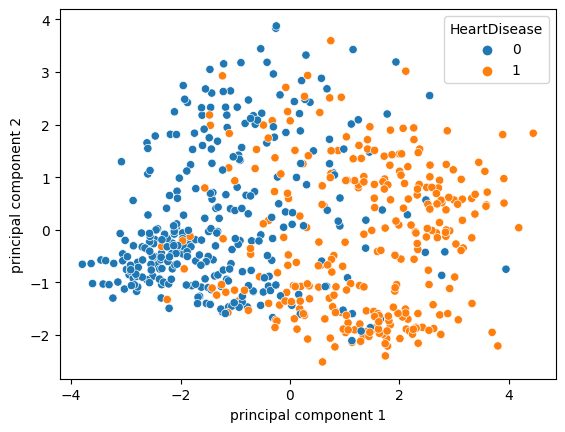

In [ ]:

sns.scatterplot(data = principal_heart_Df, x="principal component 1", y="principal component 2", hue="HeartDisease")

In [ ]:
pca = PCA(0.90)
X_train_pca = pca.fit_transform(X_train_ct)
X_valid_pca = pca.transform(X_valid_ct)
X_train_pca

array([[-1.94316591,  0.2755758 , -1.15231972, ..., -0.46911127,
        -0.01230235, -2.25198431],
       [ 0.74775279,  3.5941971 , -1.47300226, ...,  1.06009352,
        -1.25894207,  0.02761711],
       [ 0.23917349,  1.25444907, -0.28700972, ...,  0.15793432,
        -0.3105324 , -0.00605753],
       ...,
       [ 2.55942456,  0.3927093 , -0.29390578, ..., -0.95961289,
         0.38171383, -0.09264304],
       [-0.16503638,  1.06041696,  0.07975679, ...,  0.3486881 ,
         0.15225253,  0.04491148],
       [-1.92294549,  2.47892452, -1.10094635, ..., -0.14528705,
         0.42103525,  0.71520641]])

In [ ]:
X_valid_pca.shape

(150, 11)

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(X_train_pca, y_train)

LogisticRegression()

In [ ]:
model1.score(X_valid_pca, y_valid)

0.84

In [ ]:
d = {'Process': ["With pca"],
     'Accuracy': [round(model1.score(X_valid_pca, y_valid),4)]}
temp_df = pd.DataFrame(data = d)
score_df = pd.concat([score_df,temp_df],ignore_index = True)
score_df

,Process,Accuracy
0,Without pca,0.8733
1,With pca,0.8400


In [ ]:
pca.explained_variance_ratio_

array([0.21729956, 0.11505365, 0.08847937, 0.08316422, 0.07778365,
       0.07331245, 0.05663457, 0.05480334, 0.05342947, 0.04982366,
       0.04611925])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9159032049450189

In [ ]:
np.arange(pca.n_components_) +1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

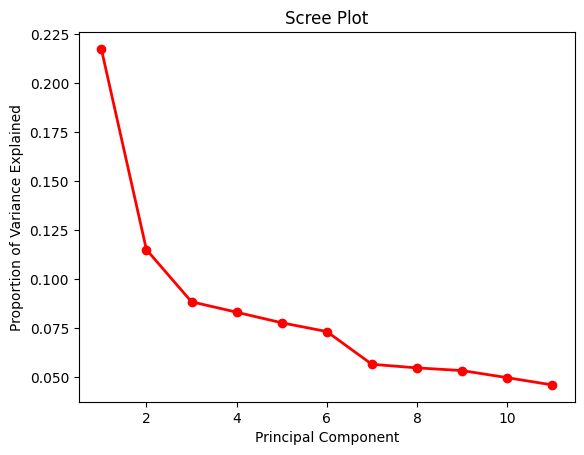

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

**Assignment 5** - Perform PCA on the following dataset and check if your score improves by using PCA

dataset - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

